---
title: "Flood Watch Report – Maui Heavy Rainfall Analysis"
author: 
  - "Kytt MacManus, Raphael Sutiono, Francisco Sanchez, Mykola Dydych, Juan F. Martinez, Ulugbek Medetov"
format: 
  html 
bibliography: m303-maui-flood-bibliography.bib
---


## Overview

On January 16, 2024, a slow-moving rainstorm over Maui, Hawaii led to significant flooding, road closures, and emergency rescues. In this lesson, learners will employ a Python workflow with NASA’s Integrated Multi-satellite Retrievals for GPM (Global Precipitation Measurement) half-hourly rainfall data, MODIS imagery, and drone photographs (from April 2024). Using open-source packages such as earthaccess, xarray, and rasterstats, participants will acquire, analyze, and visualize multi-scale remote sensing data. Then, integrate demographic layers to explore exposure, impacts, and recovery within the disaster-lifecycle framework, as defined by the [Earth Science Information Partners (ESIP)](https://wiki.esipfed.org/Disasters/Disaster_Life_Cycle). 

Maui’s population profile highlights the importance of this analysis. Around one in five residents of Maui County are seniors (>65), and one in five are children (<18) [@uscensus2024maui] - two demographics that frequently need specialized assistance during emergencies. These groups make up slightly more than 40% of the county's population. Due to high housing costs (median home value of $858K [@uscensus2024maui]) and nearly 10% of the population living below the poverty line, preparedness and recovery capabilities may be limited by financial constraints. The need for culturally sensitive disaster communication tactics is highlighted by the diverse racial makeup, which includes sizable Native Hawaiian/Pacific Islander communities. Together with spatial housing patterns (65% owner-occupied units [@uscensus2024maui]), these demographic characteristics offer crucial background information for evacuation plans, allocating resources, and launching long-term recovery initiatives.

### What will learners do?
- Authenticate and access **Integrated Multi-satellitE Retrievals for GPM (Global Precipitation Measurements) (IMERG)** precipitation with earthaccess.

- Define the Maui **Area of Interest (AOI)** using osmnx and apply spatial subsetting.

- Visualize rainfall fields and create **time-step animations** with xarray and matplotlib.

- Compare satellite-estimated rainfall with **local gauge observations**.

- Retrieve **ACS 2023** tract-level population via the **Census API** and overlay exposure.

- Produce reproducible maps, charts, and summary statistics to inform preparedness and recovery.


## Learning Objectives

By the end of this lesson, you should be able to:

  - Understand the meteorological causes and risk factors of flash floods in Maui.
  - Access and work with NASA rainfall data using Python.
  - Download, preprocess, and visualize gridded satellite rainfall data using Python.
  - Compare NASA data and rain gauge data to see similarities.
  - Integrate and analyze drone imagery to validate and supplement remote sensing results.
  - Access and process U.S. Census tract population data using Python and the Census API.
  - Overlay population and rainfall data to identify high-risk communities.
  - Visualize spatial and time series data in static maps and animated forms using matplotlib/xarray
  - Create a reproducible, automated workflow for spatial disaster analysis.
  - Communicate analytical results effectively with charts, summary maps, and recommendations for whom it affects. 


## Introduction
Floods are one of the most destructive and persistent natural hazards, affecting vast populations and resulting in enormous economic losses worldwide. In recent decades, flood occurances have risen, a trend closely linked to human-driven climate change and its impacts on the water cycle [@ceola2022unraveling; @undrr2025garfloods].

Increasing global temperatures and more extreme rainfalls are the main drivers behind the growing frequency and intensity of floods. For example, a warmer atmosphere accelerates the hydrologic cycle and produces heavier downpours and higher river flows [@chen2023impacts; @rogers2025role]. Recent large-scale studies estimate that climate change accounts for 21% of the observed rise in global flood exposure, while urbanization—-particularly dense development of people and assets in floodplains—-can account for about 77% of the increase in exposure, with urban and low-income communities facing the greatest exposure [@devitt2023flood; @rogers2025role]. Additional research focused on the United States indicates that rapid coastal urban growth is outpacing flood infrastructure upgrades, creating larger, more densely populated, and more flood-prone settlements, and similar patterns are even more acute in poorer countries where fast development collides with limited capacity to adapt [@swain2020increased; @rentschler2022flood].

**Population density** is the number of people living within a given area, such as inhabitants per square kilometer. Sources like national censuses and high-resolution gridded population datasets (for example, the [GHSL - Global Human Settlement Layer](https://human-settlement.emergency.copernicus.eu/), [WorldPop Open Population Repository (WOPR)](https://wopr.worldpop.org/), or [Gridded Population of the World, Version 4 (GPWv4)](https://doi.org/10.7910/DVN/TGGNSU)) can be used to supplement disaster analysis with dynamic information, from mobile phone call records or satellite imagery, to refine where people are actually located.​

High population density can greatly intensify the impacts of flooding because a single event affects more residents, more buildings, and more economic activity within the flooded zone, leading to higher total losses [@sanders2024quantifying].​

**Flood risk infrastructure** consists of engineered, natural, and other physical systems that aim to reduce how often floods occur and how severe their impacts are. Typical examples include levees, floodwalls, embankments, stormwater drainage networks, retention or detention basins, coastal defenses, and green infrastructure such as wetlands and vegetated buffers, all of which work in different ways to store, redirect, or slow floodwaters [@mcclymont2020flood].​

Population density and the quality of flood protection systems stand out as key factors shaping how severe flood losses become. Communities with high population density and high-value assets concentrated in one area face much greater exposure when a single flood occurs [@rogers2025role]. In contrast, well-designed flood infrastructure—such as levees, designated floodways, stormwater drainage, and green adaptation measures—can substantially curb damages, even when hazard levels increase [@fan2025exploring; @wu2021quantifying].

![Maui Disaster Assessment](data/images/maui-disaster-assessment.png)
Photo of road in Maui, Hawaii post flooding event, 2024.[^1]

[^1]: Photo Credit: Kytt MacManus

### NASA Global Precipitation Measurement (GPM)

The **[Global Precipitation Measurement (GPM) IMERG Final Precipitation L3 Half Hourly 0.1 degree x 0.1 degree V07 (GPM_3IMERGHH)](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGHH_07/summary)** provides high-resolution multi-satellite precipitation estimates [@huffman2023imerg]. This dataset is produced by the Precipitation Processing System (PPS) at NASA's Goddard Space Flight Center (GSFC) and is distributed through the [Goddard Earth Sciences Data and Information Services Center (GES DISC)](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGHH_07/summary).



### NASA Earthaccess
 
NASA's `earthaccess` is a Python library designed to simplify the process of searching, accessing, and downloading Earth science data from NASA's repositories. It integrates seamlessly with [**NASA's Earthdata Login**](https://urs.earthdata.nasa.gov/) system, allowing users to authenticate and interact with various datasets programmatically.

A NASA Earthdata Login profile is required to access Earthdata datasets for this lesson. 


### Open Street Map

[OpenStreetMap (OSM)](https://www.openstreetmap.org/) is a collaborative project that creates a free, editable map of the world, built entirely by a community of mappers. In Python, the osmnx library provides a powerful interface for querying and analyzing OSM data, including administrative boundaries, road networks, and building footprints.

In this lesson, we use `osmnx` to retrieve the geographic boundary of Hawaii from OSM and extract its bounding box to spatially filter satellite precipitation data.



## Data Analysis

::: {.callout-tip style="color: #5a7a2b;"}
#### Data Science Review

Before beginning, please note that this lesson uses the Python programming language and the following Python packages:


-   [`os`](https://docs.python.org/3/library/os.html): Provides a portable way to interact with the operating system, including file system operations and environment variables.

-   [`re`](https://docs.python.org/3/library/re.html): Enables powerful string pattern matching and text processing using regular expressions.

-   [`datetime`](https://docs.python.org/3/library/datetime.html): Used to manipulate dates and times, including timedelta arithmetic for time-based analysis.

-   [`numpy`](https://numpy.org/): Foundational package for scientific computing in Python, supporting array operations and numerical computation.

-   [`pandas`](https://pandas.pydata.org/): Offers data structures and functions for handling, analyzing, and visualizing structured data.

-   [`xarray`](https://docs.xarray.dev/): Enables working with labeled multi-dimensional arrays, ideal for processing NetCDF and other gridded scientific data.

-   [`matplotlib.pyplot`](https://matplotlib.org/stable/api/pyplot_api.html): Core plotting library for generating static, interactive, and animated visualizations in Python.

-   [`matplotlib.animation`](https://matplotlib.org/stable/api/animation_api.html): Provides tools for creating animated plots and time series visualizations.

-   [`osmnx`](https://osmnx.readthedocs.io/): Enables downloading, visualizing, and analyzing street networks and other OpenStreetMap data.

-   [`rasterio.transform`](https://rasterio.readthedocs.io/en/latest/topics/transforms.html): Supports creation and manipulation of geospatial raster transforms for coordinate referencing.

-   [`rasterstats`](https://pythonhosted.org/rasterstats/): Computes summary statistics of raster datasets over vector geometries for spatial analysis.

-   [`earthaccess`](https://earthaccess.readthedocs.io/): Simplifies NASA Earthdata access by managing authentication and dataset queries in a user-friendly way.



:::

Using Python 3.11.14, we can import these packages into the Jupyter environment


In [1]:
#  
# Standard library utilities (files, text, time handling)
#  
import os                  # Interact with the operating system (paths, files, environment variables)
import re                  # Regular expressions for pattern matching in strings
from datetime import datetime, timedelta  # Work with dates, times, and time offsets


#  
# Core scientific and tabular data analysis
#  
import numpy as np          # Numerical computing with arrays and matrices
import pandas as pd         # Tabular data analysis using DataFrames
import geopandas as gpd     # Spatial data analysis with georeferenced DataFrames
import xarray as xr         # Multidimensional labeled arrays (e.g., gridded climate or satellite data)


#  
# Visualization and animation
#  
import matplotlib.pyplot as plt       # Static plotting and visualization
import matplotlib.animation as animation  # Create animated visualizations (e.g., time series maps)


#  
# Street networks and OpenStreetMap data
#  
import osmnx as ox          # Download and analyze street networks and other OSM features


#  
# Raster data input/output and spatial analysis
#  
import rasterio             # Read, write, and process raster (gridded) geospatial data
from rasterio.transform import from_origin  # Define georeferencing for raster grids
from rasterstats import zonal_stats          # Compute statistics of raster values within vector zones


#   
# Earth observation and remote data access
#  
import earthaccess          # Access NASA Earthdata datasets (e.g., satellite precipitation, climate data)


#  
# HDF5 / NetCDF data backends
#  
import h5netcdf             # NetCDF interface built on HDF5, compatible with xarray
import h5py                 # Low-level access to HDF5 files and datasets


#  
# Web requests and APIs
#  
import requests             # Send HTTP requests to web APIs (e.g., Census, data services)


from pathlib import Path          # Handle file system paths in a platform-independent way 

from PIL import Image  # PIL is a dependency of matplotlib, usually already available


/Users/CIESINIT/miniconda3/envs/disasters/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The earthaccess library simplifies the process of accessing NASA Earthdata by handling authentication and data discovery. Before you can search or download data using earthaccess, you need to authenticate using your Earthdata Login credentials. The `earthaccess.login()` function is the starting point for this process.


In [2]:
#| eval: false
 
# Authenticate with Earthdata using your Earthdata Login credentials
# This will prompt for username/password or use existing credentials  
 earthaccess.login()

To retrieve NASA precipitation data for Hawaii using earthaccess, we begin by querying geographic boundary data from OpenStreetMap using osmnx, then extract the bounding box for the region. This bounding box is used to search for GPM IMERG half-hourly precipitation data for a specific date range. 


In [3]:
# Query Hawaii boundary from OSM  
hawaii = ox.geocode_to_gdf("Hawaii, USA")


# Extract bounding box as (lon_min, lat_min, lon_max, lat_max)
bbox = hawaii.total_bounds  # [minx, miny, maxx, maxy]
bounding_box = (bbox[0], bbox[1], bbox[2], bbox[3])

Search for GPM IMERG Half-Hourly Precipitation Data:


In [4]:
# Search for GPM IMERG Half-Hourly Level 3 data using earthaccess
results = earthaccess.search_data(
    short_name="GPM_3IMERGHH",     # Dataset short name
    version="07",                  # Dataset version
    temporal=("2024-01-16", "2024-01-17"),  # Example date range
    bounding_box=bounding_box      # Geographic bounding box for Hawaii
)

# Extract data download links from search results
all_urls = [granule.data_links()[0] for granule in results]

# Print number of URLs found
print(len(all_urls), "URLs found.")


96 URLs found.


Finally, this code will download and create a list of the file paths of the downloaded data from `earthaccess`:

In [5]:
#| eval: false
#| 
file_path = earthaccess.download(all_urls)

In [6]:
#|include: false



folder= r"/Users/CIESINIT/Documents/tops/TOPSTSCHOOL-disasters/data/2025-07-07-47e9ab"

file_path= [os.path.join(folder, f) for f in os.listdir(folder) if \
 os.path.isfile(os.path.join(folder, f))]
print(file_path)


['/Users/CIESINIT/Documents/tops/TOPSTSCHOOL-disasters/data/2025-07-07-47e9ab/3B-HHR.MS.MRG.3IMERG.20240116-S120000-E122959.0720.V07B.HDF5', '/Users/CIESINIT/Documents/tops/TOPSTSCHOOL-disasters/data/2025-07-07-47e9ab/3B-HHR.MS.MRG.3IMERG.20240117-S220000-E222959.1320.V07B.HDF5', '/Users/CIESINIT/Documents/tops/TOPSTSCHOOL-disasters/data/2025-07-07-47e9ab/3B-HHR.MS.MRG.3IMERG.20240117-S213000-E215959.1290.V07B.HDF5', '/Users/CIESINIT/Documents/tops/TOPSTSCHOOL-disasters/data/2025-07-07-47e9ab/3B-HHR.MS.MRG.3IMERG.20240116-S093000-E095959.0570.V07B.HDF5', '/Users/CIESINIT/Documents/tops/TOPSTSCHOOL-disasters/data/2025-07-07-47e9ab/3B-HHR.MS.MRG.3IMERG.20240116-S073000-E075959.0450.V07B.HDF5', '/Users/CIESINIT/Documents/tops/TOPSTSCHOOL-disasters/data/2025-07-07-47e9ab/3B-HHR.MS.MRG.3IMERG.20240116-S150000-E152959.0900.V07B.HDF5', '/Users/CIESINIT/Documents/tops/TOPSTSCHOOL-disasters/data/2025-07-07-47e9ab/3B-HHR.MS.MRG.3IMERG.20240116-S113000-E115959.0690.V07B.HDF5', '/Users/CIESINIT/Do

### Visualizing Precipitation Data

Once we’ve downloaded the GPM IMERG precipitation data, we can use `xarray` to open the **NetCDF** file and subset it to the region of interest (in this case, Hawaii). This subset is then visualized using `matplotlib` and xarray’s built-in plotting utilities to generate a precipitation map for the first available half-hourly time step.


96 observations found.


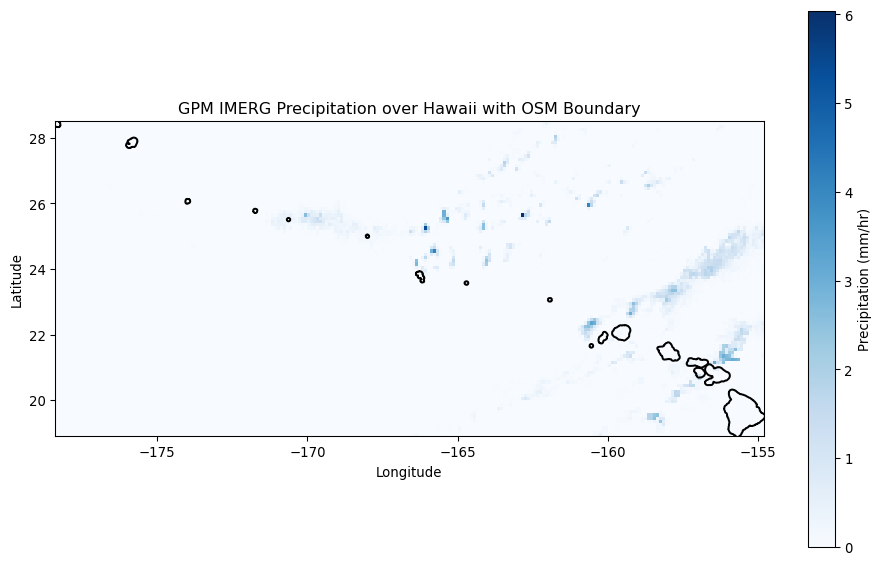

In [7]:
# Display the number of observations (files) found
print(len(file_path), "observations found.")

# Open the selected GPM IMERG dataset (e.g., 16th file in list)
with xr.open_dataset(file_path[15], engine="h5netcdf", group="Grid") as ds:

    # Subset the precipitation variable to the Hawaii bounding box
    precip_subset = ds["precipitation"].sel(
        lat=slice(bounding_box[1], bounding_box[3]),
        lon=slice(bounding_box[0], bounding_box[2])
    )

    # Select the first time step and reorient data for plotting
    data = precip_subset.isel(time=0)
    data = data.transpose("lat", "lon")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the precipitation data
data.plot(ax=ax, cmap="Blues", cbar_kwargs={"label": "Precipitation (mm/hr)"})

# Overlay the Hawaii boundary geometry from OSM
hawaii.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5)

# Add plot labels and formatting
plt.title("GPM IMERG Precipitation over Hawaii with OSM Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


## Animation: Visualizing Half-Hourly Rainfall Over Time

To understand how precipitation evolves over time, we can animate the sequence of GPM IMERG half-hourly rainfall images. This animation cycles through each file, extracts the timestamp, overlays the precipitation data on the Hawaii boundary, and renders a smooth temporal visualization using `matplotlib.animation`. This is especially helpful for spotting storm patterns and tracking rainfall intensity across the region.


In [8]:
#| eval: false

# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Load first dataset 
# Open the first NetCDF file using xarray
with xr.open_dataset(file_path[0], engine="h5netcdf", group="Grid") as ds:
    
    # Subset the precipitation variable by latitude and longitude bounds
    data0 = ds["precipitation"].sel(
        lat=slice(bounding_box[1], bounding_box[3]),    # min_lat to max_lat
        lon=slice(bounding_box[0], bounding_box[2])     # min_lon to max_lon
    ).isel(time=0).transpose("lat", "lon")              # Select first time step and orient for plotting

    # Extract longitude and latitude values as 1D arrays
    lon = data0.lon.values
    lat = data0.lat.values

    # Create 2D meshgrid from lat/lon arrays for plotting
    lon2d, lat2d = np.meshgrid(lon, lat)

    # Plot the initial frame with pcolormesh and add color shading
    mesh = ax.pcolormesh(lon2d, lat2d, data0.values, cmap="Blues", shading="auto")

    # Add a colorbar to indicate precipitation scale
    cbar = fig.colorbar(mesh, ax=ax, label="Precipitation (mm/hr)")

# Overlay the Hawaii boundary outline from OSM data
hawaii.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5, zorder=2)

# Add static plot title with frame info
title_text = ax.set_title(f"GPM IMERG Precipitation over Hawaii - Frame 1/{len(file_path)}")

# Set axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Auto-adjust layout to prevent overlap of labels and plot
plt.tight_layout()

# --- Define update function for animation ---

def update(frame_index):
    # Get the file for the current frame
    file = file_path[frame_index]

    # Open and subset the current file's data
    with xr.open_dataset(file, engine="h5netcdf", group="Grid") as ds:
        data = ds["precipitation"].sel(
            lat=slice(bounding_box[1], bounding_box[3]),  # Subset latitude
            lon=slice(bounding_box[0], bounding_box[2])   # Subset longitude
        ).isel(time=0).transpose("lat", "lon")            # Select first time slice and orient for plotting

    # Extract filename from full path
    filename = os.path.basename(file)

    # Use regex to extract date (YYYYMMDD) from filename
    match = re.search(r"3IMERG\.(\d{8})", filename)
    date_str = match.group(1)

    # Use regex to extract time (HHMM) from filename
    match = re.search(r"(\d{4}).V07B", filename)
    time_str = match.group(1)
    time_str = int(time_str)  # Convert to integer (minutes)

    # Convert extracted date/time to a datetime object in Hawaii Standard Time (HST)
    try: 
        datetime_obj = datetime.strptime(date_str, "%Y%m%d")           # Parse date string
        datetime_obj = datetime_obj + timedelta(minutes=time_str)      # Add minutes offset
        datetime_obj = datetime_obj - timedelta(hours=10)              # Convert UTC to HST
        timestamp_str = datetime_obj.strftime("%Y-%m-%d %H:%M:%S HST") # Format timestamp string

    except ValueError:
        # Handle parsing errors
        timestamp_str = f"Invalid time in filename: {time_str}"

    # Update the plot data with the current frame
    mesh.set_array(data.values.ravel())

    # Update the title with the new timestamp
    title_text.set_text(f"GPM IMERG Precipitation over Hawaii — {timestamp_str}")

    # Return updated elements for blitting
    return mesh, title_text

# --- Create the animation ---

print("Creating animation...")

ani = animation.FuncAnimation(
    fig,                # Target figure object
    update,             # Function to call for each frame
    frames=len(file_path), # Total number of frames (data files)
    interval=200,       # Delay between frames in milliseconds
    blit=True,          # Only redraw changed elements for efficiency
    repeat=False        # Stop at the last frame
)

# --- Save the animation as a GIF ---

ani.save("data/images/hawaii_precip.gif", writer="pillow", fps=3)  # Save at 3 frames per second


![Hawaii GIF](data/images/hawaii_precip.gif)

 
#### Focusing on Maui

To focus analysis on our location of analysis, we use `osmnx` to retrieve the geographic boundary for Maui County, Hawaii from **OpenStreetMap**. We then extract its bounding box and apply a small buffer (0.1 degrees) to ensure that nearby data just outside the strict boundary is included. This padded extent will be used to spatially filter satellite precipitation data or other geospatial layers relevant to the region.


In [9]:
# Get the geometry for Maui County, Hawaii from OpenStreetMap
maui = ox.geocode_to_gdf("Maui County, Hawaii, USA").to_crs("EPSG:4326")

# Extract the bounding box of Maui County as (minx, miny, maxx, maxy)
bounding_box = maui.total_bounds

# Define a small padding buffer (in degrees) around the bounding box
pad = 0.1  # ~0.1 degrees ≈ 5–6 km buffer

# Compute padded latitude and longitude boundaries
lat_min = bounding_box[1] - pad  # Southern boundary
lat_max = bounding_box[3] + pad  # Northern boundary
lon_min = bounding_box[0] - pad  # Western boundary
lon_max = bounding_box[2] + pad  # Eastern boundary


After defining the padded bounding box for Maui, we can visualize GPM IMERG half-hourly precipitation data for that area. This plot overlays satellite-derived rainfall intensity on the island’s geographic outline using `xarray` and `matplotlib`, providing spatial context for localized precipitation events.


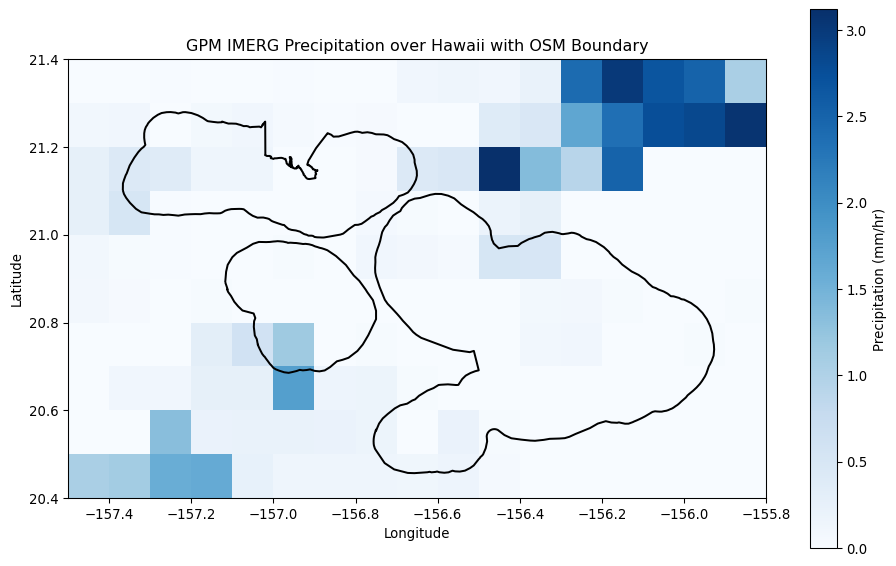

In [10]:
# Open the 16th GPM IMERG data file and extract the "Grid" group
with xr.open_dataset(file_path[15], engine="h5netcdf", group="Grid") as ds:
    
    # Subset the precipitation variable using the padded Maui bounding box
    precip_subset = ds["precipitation"].sel(
        lat=slice(lat_min, lat_max),   # Latitude range from bounding box
        lon=slice(lon_min, lon_max)    # Longitude range from bounding box
    )

    # Select the first time step in the file
    data = precip_subset.isel(time=0)

    # Rearrange dimensions for plotting: lat first, then lon
    data = data.transpose("lat", "lon")

# Initialize figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the precipitation data on the map
data.plot(ax=ax, cmap="Blues", cbar_kwargs={"label": "Precipitation (mm/hr)"})

# Overlay the Maui County boundary using OSM data
maui.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5)

# Add plot title and axis labels
plt.title("GPM IMERG Precipitation over Hawaii with OSM Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


To visualize how rainfall evolves across Maui County, this animation cycles through a sequence of GPM IMERG half-hourly datasets. For each frame, it subsets the data to the Maui region, overlays the county boundary, and updates the timestamp extracted from the filename. The animation is then saved as a `.gif` for easy sharing and visual analysis.


In [11]:
#| eval: false

# Initialize the figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 6))

# Inform the user that we're starting the first frame setup
print("Initializing plot with first data file...")

# Extract longitude and latitude from the preloaded 'data' array
lon = data.lon.values                       # 1D longitude array
lat = data.lat.values                       # 1D latitude array

# Create 2D coordinate grids from the lat/lon arrays
lon2d, lat2d = np.meshgrid(lon, lat)

# Create the first pcolormesh using initial data values
mesh = ax.pcolormesh(
    lon2d, lat2d, data.values,              # Coordinates and initial data
    cmap="Blues", shading="auto"           # Colormap and smoothing style
)

# Add a colorbar to show precipitation intensity
cbar = fig.colorbar(mesh, ax=ax, label="Precipitation (mm/hr)")

# Overlay Maui County's boundary for spatial context
maui.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5, zorder=2)

# Set static elements for the plot: title and axis labels
title_text = ax.set_title(f"GPM IMERG Precipitation over Hawaii - Frame 1/{len(file_path)}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()  # Optimize spacing to prevent overlap

# --- Define the animation update function ---

def update(frame_index):
    # Get the file corresponding to the current animation frame
    file = file_path[frame_index]

    # Open and subset the dataset for Maui bounding box
    with xr.open_dataset(file, engine="h5netcdf", group="Grid") as ds:
        data = ds["precipitation"].sel(
            lat=slice(lat_min, lat_max),   # Subset latitude
            lon=slice(lon_min, lon_max)    # Subset longitude
        ).isel(time=0).transpose("lat", "lon")  # Select first timestep and rearrange dimensions

    # Extract the base filename (no directory)
    filename = os.path.basename(file)

    # Extract date string (YYYYMMDD) from filename using regex
    match = re.search(r"3IMERG\.(\d{8})", filename)
    date_str = match.group(1)

    # Extract time offset (HHMM in minutes) from filename
    match = re.search(r"(\d{4}).V07B", filename)
    time_str = match.group(1)
    time_str = int(time_str)  # Convert to integer

    # Attempt to convert extracted date and time to formatted timestamp
    try: 
        datetime_obj = datetime.strptime(date_str, "%Y%m%d")       # Parse date
        datetime_obj += timedelta(minutes=time_str)                # Add time offset
        datetime_obj -= timedelta(hours=10)                        # Convert from UTC to HST
        timestamp_str = datetime_obj.strftime("%Y-%m-%d %H:%M:%S HST")  # Format timestamp
    except ValueError:
        # Handle invalid or missing time values
        timestamp_str = f"Invalid time in filename: {time_str}"

    # Update plot with new data values and title
    mesh.set_array(data.values.ravel())  # Flatten the data into 1D for pcolormesh
    title_text.set_text(f"GPM IMERG Precipitation over Hawaii — {timestamp_str}")

    return mesh, title_text  # Return updated elements for blitting

# --- Generate the animation ---

print("Creating animation...")

ani = animation.FuncAnimation(
    fig,            # The figure object to update
    update,         # The update function called per frame
    frames=len(file_path),  # Number of frames = number of files
    interval=200,   # Delay between frames (ms)
    blit=True,      # Use blitting for efficient updates
    repeat=False    # Run only once
)

# --- Save the animation as a GIF ---

ani.save("data/images/maui_precip.gif", writer="pillow", fps=3)  # Save to file at 3 frames per second

![Maui GIF](data/images/maui_precip.gif)

### Extracting Time Series of Mean Precipitation Over Maui


We can use the GPM IMERG half-hourly precipitation files to calculates the mean rainfall over Maui County for each timestep. The data is spatially subset to the OSM Maui bounding box, rasterized using a *geographic transform*, and then aggregated over the island polygon using the function `zonal_stats`. Results are compiled into a *DataFrame* for further analysis or plotting.


In [12]:
# Prepare an empty list to store the results for each file
results = []

# Loop through each file in the downloaded GPM IMERG dataset
for file in file_path:
    try:
        # --- Open and subset precipitation data ---
        with xr.open_dataset(file, engine="h5netcdf", group="Grid") as ds:
            # Select and subset precipitation for Maui bounding box
            data = ds["precipitation"].sel(
                lat=slice(lat_min, lat_max),     # Latitude bounds
                lon=slice(lon_min, lon_max)      # Longitude bounds
            ).isel(time=0).transpose("lat", "lon")  # First timestep and axis order for raster analysis

        # --- Build affine transform for georeferencing raster ---
        lats = data["lat"].values              # Latitude array
        lons = data["lon"].values              # Longitude array
        res_x = lons[1] - lons[0]              # Pixel width
        res_y = lats[1] - lats[0]              # Pixel height (note: no flip needed if ordered from top to bottom)
        transform = from_origin(
            west=lons.min(),                   # Western edge
            north=lats.max(),                  # Northern edge
            xsize=res_x,                       # Horizontal resolution
            ysize=res_y                        # Vertical resolution
        )

        # --- Extract raw array of precipitation values ---
        arr = data.values                      # 2D array (lat × lon)

        # --- Parse datetime from filename ---
        filename = os.path.basename(file)      # Extract base filename
        match_date = re.search(r"3IMERG\.(\d{8})", filename)   # Extract date string (YYYYMMDD)
        match_min = re.search(r"\.(\d{4,5})\.V", filename)     # Extract time in minutes

        if match_date and match_min:
            date_str = match_date.group(1)
            mins_str = match_min.group(1)
            dt = datetime.strptime(date_str, "%Y%m%d") + timedelta(minutes=int(mins_str))  # Combine date and time
            dt = dt - timedelta(hours=10)      # Convert from UTC to Hawaii Standard Time
        else:
            dt = None                          # Fallback if parsing fails

        # --- Compute zonal mean over the Maui polygon ---
        stats = zonal_stats(
            maui,                              # Polygon geometry
            arr,                               # Raster array
            affine=transform,                  # Spatial transform
            stats="mean",                      # Compute mean value
            nodata=np.nan                      # Handle missing values
        )[0]

        # Extract mean precipitation value from the stats result
        mean_precip = stats["mean"]

        # Append timestamp and mean to results list
        results.append({
            "datetime": dt,
            "mean_precip": mean_precip
        })

    except Exception as e:
        # Catch and report any errors (e.g., malformed file or data)
        print(f"Skipping file {file} due to error: {e}")

# --- Convert results list to a clean DataFrame ---
results_df = pd.DataFrame(results)  # Each row: [datetime, mean_precip]

results_df = results_df.sort_values(by="datetime")


Now that we’ve extracted mean precipitation values for each GPM IMERG file, we can visualize how rainfall changes over time across Maui County. This line plot presents a temporal snapshot of precipitation intensity, helping to identify storm events, rainfall variability, and dry periods.


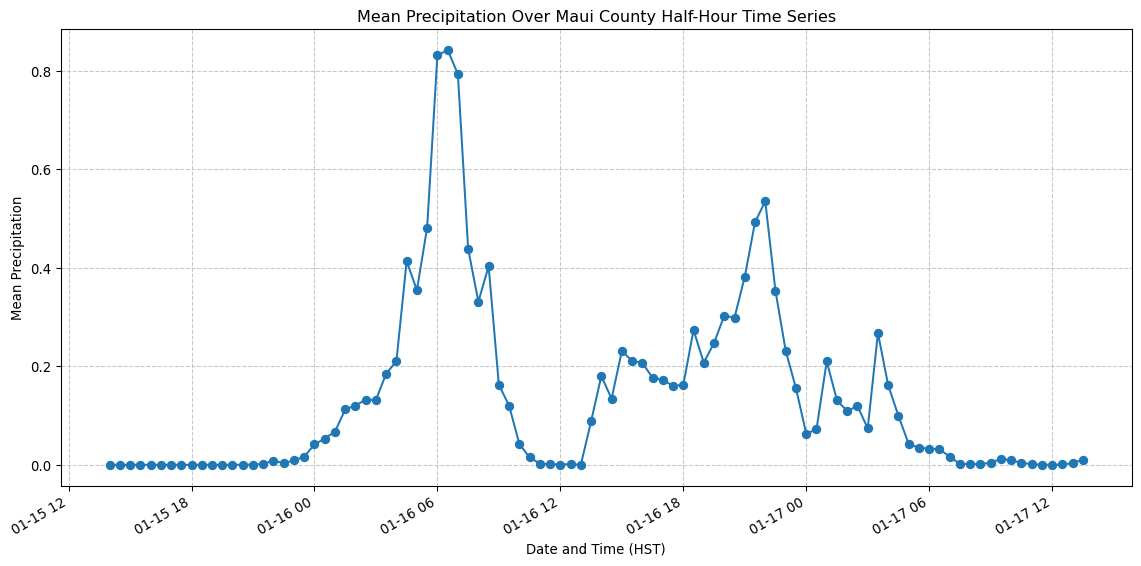

In [13]:
# Create the time series line plot
plt.figure(figsize=(12, 6))  # Set figure size for clarity and legibility

# Plot datetime vs. mean precipitation with markers and connecting lines
plt.plot(results_df['datetime'], results_df['mean_precip'], marker='o', linestyle='-')

# Add a title and axis labels to describe the plot
plt.title('Mean Precipitation Over Maui County Half-Hour Time Series')     # Plot title
plt.xlabel('Date and Time (HST)')                                 # X-axis label
plt.ylabel('Mean Precipitation')                                  # Y-axis label (units assumed mm/hr)

# Automatically format x-axis to prevent overlapping date labels
plt.gcf().autofmt_xdate()  # Rotate and align date labels on the x-axis

# Add a dashed grid to the background for easier reading
plt.grid(True, linestyle='--', alpha=0.7)  # Enable grid with light dashed lines

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plot in the output cell
plt.show()

## Comparing IMERG Sattelite data and Oberved Precipitation data

The data for this report comes from the Kahului Airport and downloaded from [WeatherSpark](https://weatherspark.com/h/d/150359/2024/1/16/Historical-Weather-on-Tuesday-January-16-2024-in-Maui-Hawaii-United-States#metar-00-14).


In [14]:
# Load your CSV (update with your actual file path)
obs_df = pd.read_csv("data/maui_rain/maui_rain_gauge_Jan2024.csv")
 

# Parse datetime
obs_df["datetime"] = pd.to_datetime(obs_df["Date"] + " " + obs_df["Time"])

# Convert precipitation to float
obs_df["obs_precip"] = obs_df["Precipitation"].str.replace(" in", "", regex=False).astype(float)


/var/folders/wl/y9t6glk11hq5gtqw7gx3fwy80000gp/T/ipykernel_96444/3286023823.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  obs_df["datetime"] = pd.to_datetime(obs_df["Date"] + " " + obs_df["Time"])


Plot the data with dual y-axis without proportional scaling to visually compare the two datasets.


/var/folders/wl/y9t6glk11hq5gtqw7gx3fwy80000gp/T/ipykernel_96444/2757781746.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  obs_df["datetime"] = pd.to_datetime(obs_df["Date"] + " " + obs_df["Time"])


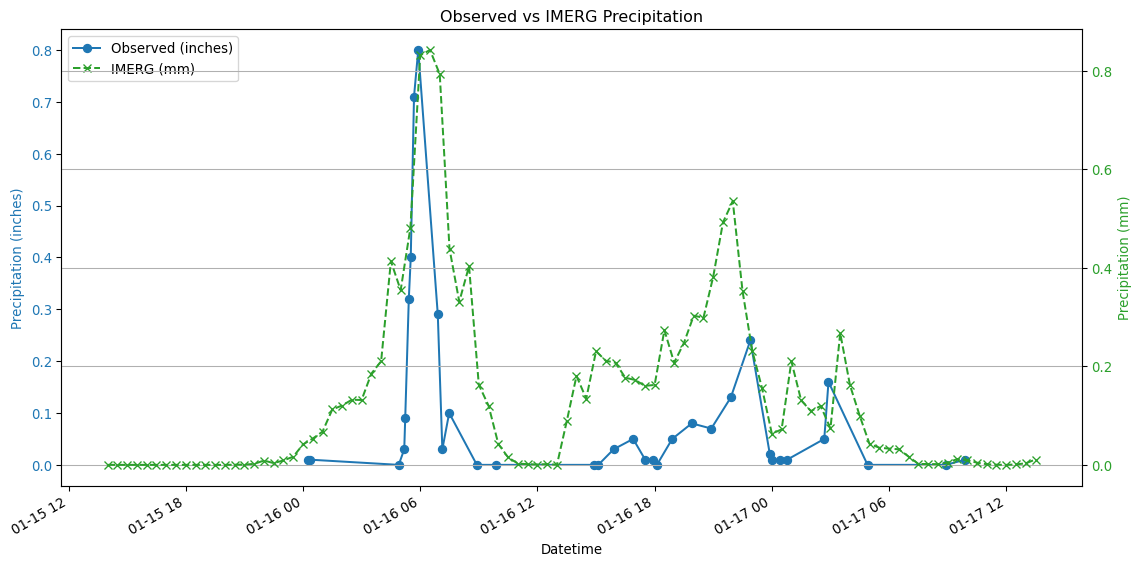

In [15]:
# Make sure datetime columns are parsed
obs_df["datetime"] = pd.to_datetime(obs_df["Date"] + " " + obs_df["Time"])
obs_df["obs_precip"] = obs_df["Precipitation"].str.replace(" in", "", regex=False).astype(float)

results_df["datetime"] = pd.to_datetime(results_df["datetime"])

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot observed precipitation on left y-axis
line1, = ax1.plot(
    obs_df["datetime"], obs_df["obs_precip"],
    label="Observed (inches)", color="tab:blue", marker="o"
)
ax1.set_ylabel("Precipitation (inches)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Create right y-axis
ax2 = ax1.twinx()

# Plot IMERG precipitation on right y-axis (assumed in mm)
line2, = ax2.plot(
    results_df["datetime"], results_df["mean_precip"],
    label="IMERG (mm)", color="tab:green", marker="x", linestyle="--"
)
ax2.set_ylabel("Precipitation (mm)", color="tab:green")
ax2.tick_params(axis='y', labelcolor="tab:green")

# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# Formatting
plt.title("Observed vs IMERG Precipitation")
ax1.set_xlabel("Datetime")
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()


## Integrating Maui Census Tract Data

This section downloads the latest census tract shapefile for Hawaii and loads it as a GeoDataFrame.


In [16]:
shapefile_zip = "data/maui_rain/tl_2023_15_tract.zip"
shapefile_dir = "data/maui_rain/tl_2023_15_tract"

In [17]:
#| eval: false

# Set URLs and file paths
tiger_url = "https://www2.census.gov/geo/tiger/TIGER2023/TRACT/tl_2023_15_tract.zip"



# Ensure the directory exists
os.makedirs(os.path.dirname(shapefile_zip), exist_ok=True)

# Download and extract if not already present
if not os.path.exists(shapefile_dir):
    r = requests.get(tiger_url, verify=False)
    with open(shapefile_zip, 'wb') as f:
        f.write(r.content)
    with zipfile.ZipFile(shapefile_zip, 'r') as zip_ref:
        zip_ref.extractall(shapefile_dir)

In [18]:
# Load shapefile
tracts = gpd.read_file(os.path.join(shapefile_dir, 'tl_2023_15_tract.shp'))

## Fetch ACS 2023 Population Data for Maui Tracts

This section retrieves the latest census population data for Maui tracts and merges it with the shapefile.


In [19]:
#| eval: false


# Provide your Census API key
API_KEY = "API_KEY"
acs_url = (
    "https://api.census.gov/data/2023/acs/acs5"
    "?get=NAME,B01003_001E&for=tract:*&in=state:15+county:009"
    f"&key={API_KEY}"
)

response = requests.get(acs_url)

In [20]:
#| echo: false



# Provide your Census API key
API_KEY = "4c4fb31afba1ae4fbf35b9f8a0d0d65e0432f6e9"
acs_url = (
    "https://api.census.gov/data/2023/acs/acs5"
    "?get=NAME,B01003_001E&for=tract:*&in=state:15+county:009"
    f"&key={API_KEY}"
)

response = requests.get(acs_url)

## Combining Census data with TIGER shapes

This code converts a Census API JSON response into a pandas DataFrame and constructs a geographic identifier (GEOID) by concatenating state, county, and tract codes. It then joins the Census population data to a GeoDataFrame of census tracts using the GEOID as a key. Finally, it ensures the population values are numeric so they can be used reliably in analysis and mapping.


In [21]:
census_data = response.json()
census_df = pd.DataFrame(census_data[1:], columns=census_data[0])
census_df['GEOID'] = census_df['state'] + census_df['county'] + census_df['tract']

# Merge population data with tracts
tracts = tracts.merge(
    census_df[['GEOID', 'B01003_001E']],
    on='GEOID',
    how='left'
)
tracts['B01003_001E'] = pd.to_numeric(tracts['B01003_001E'])

We can use the IMERG files to find a precipitation range, then use that range to keep a consistent (log-scaled) color normalization across time frames. 

We can plot an animated precipitation raster over Maui and overlays census tracts colored by population, updating the raster and the timestamped title for each frame. Finally, it saves the result as a GIF.


In [22]:
#| eval: false

global_min, global_max = np.inf, -np.inf
for file in file_path:
    with xr.open_dataset(file, engine="h5netcdf", group="Grid") as ds:
        precip = ds["precipitation"].sel(
            lat=slice(lat_min, lat_max),
            lon=slice(lon_min, lon_max)
        ).isel(time=0).transpose("lat", "lon")
        current_min = precip.min().item()
        current_max = precip.max().item()
        if np.isfinite(current_min): global_min = min(global_min, current_min)
        if np.isfinite(current_max): global_max = max(global_max, current_max)

# Optional: Use a LogNorm to enhance contrast
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=0.05, vmax=global_max)

fig, ax = plt.subplots( )

# Load first raster
with xr.open_dataset(file_path[0], engine="h5netcdf", group="Grid") as ds:
    data0 = ds["precipitation"].sel(
        lat=slice(lat_min, lat_max),
        lon=slice(lon_min, lon_max)
    ).isel(time=0).transpose("lat", "lon")
    lon = ds["lon"].sel(lon=slice(lon_min, lon_max)).values
    lat = ds["lat"].sel(lat=slice(lat_min, lat_max)).values

lon2d, lat2d = np.meshgrid(lon, lat)

# Plot base precipitation frame
mesh = ax.pcolormesh(
    lon2d, lat2d, data0.values,
    cmap="Blues", shading="auto", norm=norm, zorder=1
)
cbar = fig.colorbar(mesh, ax=ax, label="Precipitation (mm/hr)")

# Plot census tracts colored by population
tracts.plot(
    ax=ax,
    column='B01003_001E',
    cmap='Reds',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.6,
    zorder=2,
    legend=True,
    legend_kwds={'label': "Population (ACS B01003_001E)"}
)

# Title and axes
title_text = ax.set_title("Frame 1")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()

# -----------------------------
#  Define Animation
# -----------------------------
def update(frame_index):
    file = file_path[frame_index]
    with xr.open_dataset(file, engine="h5netcdf", group="Grid") as ds:
        data = ds["precipitation"].sel(
            lat=slice(lat_min, lat_max),
            lon=slice(lon_min, lon_max)
        ).isel(time=0).transpose("lat", "lon")
    
    # Update raster data
    data_vals = data.values
    data_vals[data_vals <= 0] = np.nan  # Avoid log(0)
    mesh.set_array(data_vals.ravel())

    # Timestamp label
    filename = os.path.basename(file)
    date_match = re.search(r"3IMERG\.(\d{8})", filename)
    time_match = re.search(r"(\d{4}).V07B", filename)
    if date_match and time_match:
        date_str = date_match.group(1)
        minutes = int(time_match.group(1))
        dt = datetime.strptime(date_str, "%Y%m%d") + timedelta(minutes=minutes) - timedelta(hours=10)
        label = dt.strftime("%Y-%m-%d %H:%M:%S HST")
    else:
        label = "Unknown timestamp"

    title_text.set_text(f"Maui 2023 Population & Precipitation — {label}")
    return mesh, title_text

#  
#  Run and Save Animation
#  
ani = animation.FuncAnimation(
    fig, update, frames=len(file_path),
    interval=200, blit=True, repeat=False
)

ani.save("data/images/maui_precip_population.gif", writer="pillow", fps=3)

![Maui Rain Population GIF](data/images/maui_precip_population.gif)


## Using Drone Data for Damage Assessment

Using **infrared (thermal) drone images for flooding damage assessment** helps identify water extent, saturation, and temperature contrasts that are not always visible in standard imagery. Thermal sensors can distinguish standing water from wet soil and detect moisture intrusion in buildings, supporting more accurate damage classification. Repeated infrared flights allow analysts to monitor receding floodwaters and lingering moisture that may indicate ongoing risk to structures or infrastructure. 

When combined with elevation, land cover, and parcel data, thermal imagery improves understanding of flood impacts across neighborhoods. As with all drone operations, data collection should follow airspace regulations and account for privacy and ethical considerations when surveying affected communities.


In [23]:
#| eval: false

# Folder containing infrared JPEG frames
frames_dir = "data/images/thermal"
image_files = sorted([
    os.path.join(frames_dir, f)
    for f in os.listdir(frames_dir)
    if f.lower().endswith("_t.jpg") or f.lower().endswith("_t.jpeg")
])

We can plot the infrared images found from the drone to perform a damage assessment of roads in Maui and create a GIF animnation.


In [24]:
#| eval: false

# skip first 10, then take the next 25
subset_files = image_files[10:35]


# Set up the figure
fig, ax = plt.subplots()
ax.axis("off")

# Load the first frame
img = Image.open(subset_files[0])
im = ax.imshow(img, cmap="inferno")

def update(frame):
    img = Image.open(subset_files[frame])
    im.set_data(img)
    return [im]

# Create animation
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(subset_files),
    interval=200,   # milliseconds between frames
    blit=True
)

# Save as GIF
ani.save("data/images/infrared_flood_animation.gif",
    writer="pillow",
    fps=4
)

plt.close(fig)

![Maui Drone Infrared GIF](data/images/infrared_flood_animation.gif)


## Discussion
The analysis demonstrated that intense storms, such as the one that caused flooding in Maui in January 2024, can be studied effectively with the aid of open data and Python tools. Working with NASA’s IMERG rainfall dataset enabled us to observe the storms’ timing, intensity, and movement at 30-minute intervals. The animation helped highlight those transitions, making the storms peak visualize and link with population density data.

When we compared NASA’s IMERG estimates with the Kahului Airport rain gauge data, we got similar rainfall timings, yet the exact rainfall totals differed. The main reason is that IMERG covers a large grid while a rain gauge measures a single point. Despite the difference, both sources demonstrated the same main rainfall surge.

After adding 2023 census tract data, we were able to connect the rainfall patterns to communities. The overlap between the heaviest rainfall zones and the tracts with more seniors, children, and lower-income households showed clear differences in potential exposure. The demographic data combined with environmental data portrayed a more complete picture of risk. It showed not only where flooding was likely to occur, but also who might have the hardest time and will likely need help. 

The drone and MODIS imagery showed how surface water accumulated after the event. Even though the drone images were captured months after the event, they provided great context for infrastructure and drainage paths. Combined with satellite data, they confirmed which areas were repeatedly saturated and their likely causes.

However, there are gaps in how infrastructure quality is measured. Open datasets on drainage systems and culvert capacity are limited. Due to the lack of datasets, we used spatial proxies in the analysis to find approximate flood pathways. Despite the constraints, we were able to identify several low-lying transportation pathways and coastal plains that may need improvement to reduce the damage if the event occurs again.

Finally, the demographic of Maui added a social perspective to the technical analysis. Due to a large number of Native Hawaiian and Pacific Islander residents and a high cost of living, flood response efficiency depends not only on weather forecasts but also on communication and access. By linking rainfall intensity with population distribution, this analysis shows where outreach, support, and resources are needed most, reinforcing that flood risk is as much about people as it is about precipitation.

## Conclusion
You have just completed a hands-on exploration of how open datasets and Python workflows can be used to study flood impacts, using Maui flooding as an example. Through this analysis, we learned how to combine rainfall observations, population data, and spatial layers to understand both environmental and social exposure to storms.

Throughout the process, we were able to:
Access and visualize NASA’s IMERG rainfall data to observe storm timing, intensity, and movement.
Compare satellite rainfall estimates with ground-based station data, validate patterns, and detect differences.
Merge census tract boundaries with rainfall layers to outline which locations are most exposed to heavy rainfall.
Use spatial analysis tools to identify low-lying areas, coastal zones, and transportal pathways with higher flood risk.
Combine demographic and environmental data to figure out which populations, areas, and communities are likely to face greater challenges.

By utilizing both environmental and demographic information, this project demonstrated how data analytics can support disaster preparedness and recovery planning. Understanding which areas are most likely to be in danger and who lives there helps communities and first responders create a smarter plan of action, allocate resources efficiently, and strengthen population and infrastructure for future storms.

## Summary
This workflow demonstrates how to:

- Download and merge census tract boundaries and population data for Maui.
- Process and map local rainfall station observations.
- Overlay demographic and environmental data for actionable disaster analysis.

You can expand this analysis by incorporating additional census variables, different time periods, or more advanced spatial statistics as needed for your project.   
